A generalized inverse is a matrix that takes some of the properties of a matrix inverse, but not all of them.
Typically they tend to follow these properties

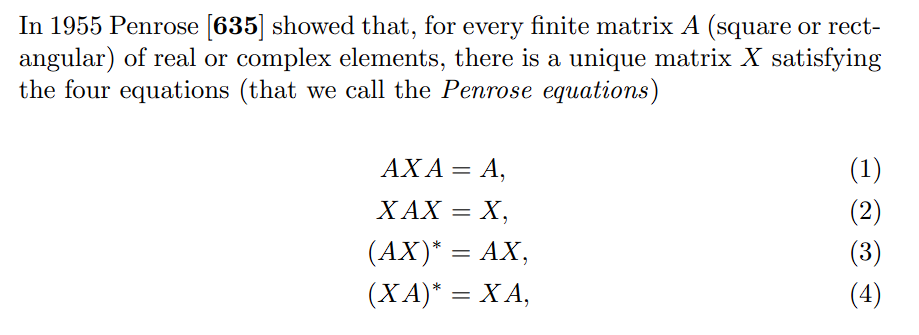

Notice that if X is the traditional matrix inverse than it satisfies all of these properties

A matrix that solves all of these conditions is known as the Moore-Penrose Inverse. In 1955 MacDuffee introduced the following formula for the matrix inverse,
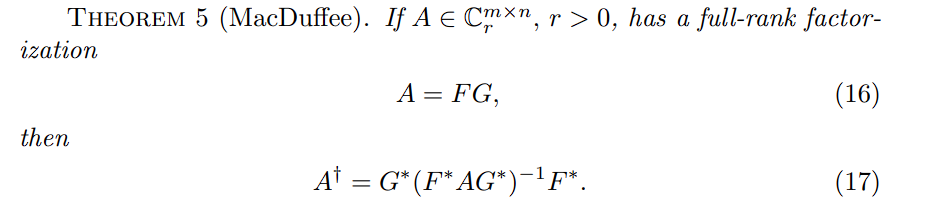

Calculating the Moore-Penrose inverse then becomes a matter of finding the full rank factorization of A in terms of a full column rank matrix F and a full row rank matrix G then plugging them into the following formula. Using the python libtary sympy this isn't too difficult!

In [2]:
from sympy.physics.quantum.dagger import Dagger
from sympy import *

To find the full column rank matrix F, we need to eliminate the columns which are not pivot columns, mathematically this corresponds to columns which are linearly dependent with respect to the other columns.

In [3]:
A = Matrix([[1,3,1,4],[2,7,3,9],[1,5,3,1],[1,2,0,8]])
A

Matrix([
[1, 3, 1, 4],
[2, 7, 3, 9],
[1, 5, 3, 1],
[1, 2, 0, 8]])

In this matrix here we can see that the final column is a linearly dependent on the first two as you can simply add the first two columns and obtain the final one. Since the final column is linearly dependent then the F matrix is the row reduced matrix of A, but now we eliminate the final column (this will give us a 3x2 column matrix). Lets use sympy to make that calculation

In [4]:
F = 1*A # This is a fancy way of copying our original matrix so that the F.del operation on the final line does not end up being applied to A
rows,columns = shape(F)
RREF,pivot_indexs = F.rref()
for col in range(columns):
    if col not in pivot_indexs:
        F.col_del(col)
F

Matrix([
[1, 3, 4],
[2, 7, 9],
[1, 5, 1],
[1, 2, 8]])

The above has sucessfully calculate F, the full column rank matrix element. Next we calculate G, which is the full row rank matrix

In [5]:
# Eliminates the zero rows in a matrix
G = (1*A).rref()[0]
rows,columns = shape(G)
for r in range(rows):
    if G.row(r) == Matrix([[0]*columns]):
        G.row_del(r)
G

Matrix([
[1, 0, -2, 0],
[0, 1,  1, 0],
[0, 0,  0, 1]])

Lets validate our full rank factorization by making sure that A = FG

In [6]:
F*G

Matrix([
[1, 3, 1, 4],
[2, 7, 3, 9],
[1, 5, 3, 1],
[1, 2, 0, 8]])

Perfect now we can apply the formula and obtain the Moore-Penrose inverse

In [7]:
X_M = Dagger(G) * (G * Dagger(G)).inv() * (Dagger(F)*F).inv()*Dagger(F)
X_M

Matrix([
[ 31/15, -26/45,  -2/9, -16/45],
[ 41/30, -31/90, -1/18, -13/45],
[-83/30,  73/90,  7/18,  19/45],
[  -3/5,    1/5,     0,    1/5]])

There's another type of generalized inverse known as the Drazin inverse, which can also be calcualted in terms of a formula based on the entries of F and G

In [8]:
X_D = F*(G*F*G*F).inv()*G
X_D

Matrix([
[34/5, 11/2, -81/10, -87/10],
[  -1, -3/4,    5/4,    5/4],
[-2/5, -1/4,  11/20,   7/20],
[-3/5, -1/2,   7/10,   9/10]])